<a href="https://colab.research.google.com/github/saadrza/XAI/blob/main/Copy_of_Copy_of_XAI_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# *Project Start*


*   Install and Import important Packages
*   Import the model
*   Transform the images
*   Generate Predicitons




# Install and Import Important Packages

In [4]:
%pip install lime
!pip install tensorflow
import os
import keras
from keras import layers

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import cv2
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split


from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
%matplotlib inline
print('Notebook run using keras:', keras.__version__)
#display
from IPython.display import Image, display


Notebook run using keras: 3.8.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming your folder is in 'My Drive/my_folder'
folder_path = '/content/drive/My Drive/data_XAI/pancreas/pancreas/'  # Replace with your actual folder path

# List all files in the folder
!ls "{folder_path}"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
attention_label  image	test  train  val


In [6]:
path= folder_path + "image/"
print(path)

/content/drive/My Drive/data_XAI/pancreas/pancreas/image/


In [8]:
'''
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import shutil

# Path to your dataset folder containing 'with_tumor' and 'without_tumor' subfolders
dataset_dir = path



# Split dataset into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Function to create directories and move images into corresponding directories
def move_images(image_paths, labels, split_dir):
    for i, image_path in enumerate(image_paths):
        label = labels[i]
        # Create subdirectories for each class in the split directory
        label_dir = 'pos' if label == 1 else 'neg'
        class_dir = os.path.join(split_dir, label_dir)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        # Move the image into the corresponding class directory
        shutil.copy(image_path, os.path.join(class_dir, os.path.basename(image_path)))

# Define paths for your splits
train_dir = folder_path+ 'train'
val_dir =  folder_path+ 'val'
test_dir = folder_path+ 'test'

# Move images into the respective directories for each split
move_images(X_train, y_train, train_dir)
move_images(X_val, y_val, val_dir)
move_images(X_test, y_test, test_dir)

print(f'Train set: {len(X_train)} images')
print(f'Validation set: {len(X_val)} images')
print(f'Test set: {len(X_test)} images')

'''

# Define paths for your splits
train_dir = folder_path+ 'train'
val_dir =  folder_path+ 'val'
test_dir = folder_path+ 'test'



---



In [10]:
folder_path

'/content/drive/My Drive/data_XAI/pancreas/pancreas/'

In [15]:
batch_size = 16
img_height = 299
img_width = 299

In [14]:
folder_path


'/content/drive/My Drive/data_XAI/pancreas/pancreas/'

In [18]:
path_train =  folder_path + 'train/'
path_val = folder_path + 'val/'
path_test = folder_path+ 'test/'
'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=1,

)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_val,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=1,

)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_test,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=1,


)
'''

"\ntrain_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    path_train,\n    labels='inferred',\n    label_mode='int',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=1,\n\n)\n\nval_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    path_val,\n    labels='inferred',\n    label_mode='int',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=1,\n\n)\ntest_ds = tf.keras.preprocessing.image_dataset_from_directory(\n    path_test,\n    labels='inferred',\n    label_mode='int',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=1,\n\n\n)\n"

Found 259 files belonging to 2 classes.
Found 56 files belonging to 2 classes.
Found 56 files belonging to 2 classes.
Number of training batches:   17
Number of validation batches: 4
Number of testing batches:    4
Total training samples:       272
Total validation samples:     64
Total testing samples:        64


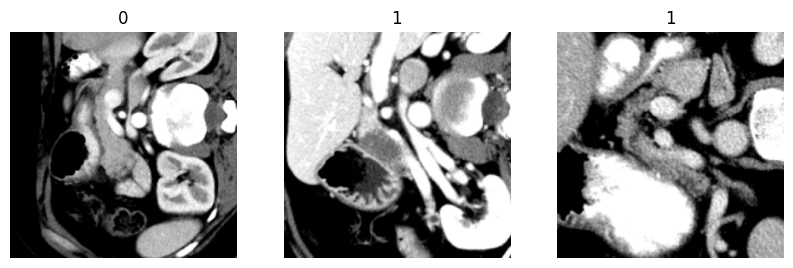

In [19]:
def loading_data(path, batch_size, img_height, img_width, train_ratio, val_ratio):
  # Load the full dataset from both pos and neg folders
  path_train =  folder_path + 'train/'
  path_val = folder_path + 'val/'
  path_test = folder_path+ 'test/'

  train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      path_train,
      labels='inferred',
      label_mode='int',
      batch_size=batch_size,
      image_size=(img_height, img_width),
      shuffle=True,
      seed=1,

  )

  val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      path_val,
      labels='inferred',
      label_mode='int',
      batch_size=batch_size,
      image_size=(img_height, img_width),
      shuffle=True,
      seed=1,

  )
  test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      path_test,
      labels='inferred',
      label_mode='int',
      batch_size=batch_size,
      image_size=(img_height, img_width),
      shuffle=True,
      seed=1,

  )


  print(f"Number of training batches:   {train_ds.cardinality()}")
  print(f"Number of validation batches: {val_ds.cardinality()}")
  print(f"Number of testing batches:    {test_ds.cardinality()}")

  print(f"Total training samples:       {train_ds.cardinality().numpy() * batch_size}")
  print(f"Total validation samples:     {val_ds.cardinality().numpy() * batch_size}")
  print(f"Total testing samples:        {test_ds.cardinality().numpy() * batch_size}")

   # Plot some images from the training dataset
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):  # Take one batch of images
      for i in range(3):  # Plot the first 9 images
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))  # Extract individual image
          plt.title(int(labels[i])) # Convert label to class name
          plt.axis("off")
  plt.show()

  return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = loading_data(folder_path, batch_size, img_height, img_width, train_ratio= 0.7, val_ratio=0.2)

In [21]:
for image, label in test_ds:
  print("label is", label)


label is tf.Tensor([0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1], shape=(16,), dtype=int32)
label is tf.Tensor([0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0], shape=(16,), dtype=int32)
label is tf.Tensor([1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1], shape=(16,), dtype=int32)
label is tf.Tensor([1 1 1 1 1 1 1 1], shape=(8,), dtype=int32)


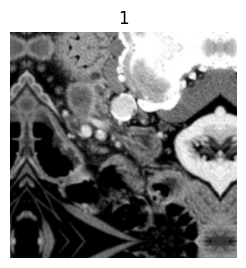

In [25]:
def preprocess_data(train_ds, val_ds, test_ds, resize_dim):

  resize_fn = keras.layers.Resizing(resize_dim, resize_dim)

  train_ds = train_ds.map(lambda x, y: (resize_fn(x), y))
  val_ds = val_ds.map(lambda x, y: (resize_fn(x), y))
  test_ds = test_ds.map(lambda x, y: (resize_fn(x), y))


  augmentation_layers = [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.2),
      layers.RandomZoom(0.2),
  ]


  def data_augmentation(x):
      for layer in augmentation_layers:
          x = layer(x)
      return x


  train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

  for images, labels in train_ds.take(1):
      plt.figure(figsize=(10, 10))
      first_image = images[0]
      for i in range(1):
          ax = plt.subplot(3, 3, i + 1)
          augmented_image = data_augmentation(np.expand_dims(first_image, 0))
          plt.imshow(np.array(augmented_image[0]).astype("int32"))
          plt.title(int(labels[0]))
          plt.axis("off")

  return train_ds, val_ds, test_ds


train_ds, val_ds, test_ds= preprocess_data(train_ds, val_ds, test_ds, resize_dim= img_width)

# Install the base model and fine tune it

In [79]:
batch_size

16

In [36]:
#model.save(path +'./model_xception_batch16_epoch5_imgsize299.keras')
#inet_model = model



---





---



In [26]:
path

'/content/drive/My Drive/data_XAI/pancreas/pancreas/image/'

In [27]:
# Load the saved model
loaded_model = keras.models.load_model(path +'./model_xception_batch16_epoch5_imgsize299.keras')

# Print the model summary
print(loaded_model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,481,533 (238.35 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 41,618,004 (158.76 MB)

None


In [34]:
model= loaded_model


print("Test dataset evaluation")
model.evaluate(test_ds)

In [28]:
preds = loaded_model.predict(test_ds)
preds

4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step


array([[ 3.3122299 ],
       [-1.4156984 ],
       [ 2.4169188 ],
       [ 3.8364837 ],
       [ 0.78558266],
       [ 3.4951773 ],
       [ 2.6805224 ],
       [ 3.5190732 ],
       [ 1.2645899 ],
       [ 3.3518682 ],
       [ 2.6423986 ],
       [ 1.9540141 ],
       [-0.34933448],
       [-0.67489636],
       [ 1.8244988 ],
       [ 1.8494585 ],
       [ 1.7799884 ],
       [ 0.65377855],
       [ 4.512398  ],
       [ 1.884759  ],
       [ 0.77805734],
       [ 1.4251438 ],
       [ 1.901497  ],
       [ 0.21909977],
       [ 2.6896074 ],
       [-0.48551592],
       [ 2.896919  ],
       [ 0.73741955],
       [ 1.3505149 ],
       [-0.26656488],
       [ 0.3235563 ],
       [ 3.5193336 ],
       [ 0.85405385],
       [ 2.0604155 ],
       [ 0.38797152],
       [ 1.8541609 ],
       [ 1.0628928 ],
       [-0.04086511],
       [ 1.8863313 ],
       [-1.581893  ],
       [-0.14027975],
       [ 1.9323932 ],
       [-0.27149284],
       [ 2.331681  ],
       [ 3.1173105 ],
       [ 1

In [29]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import tensorflow as tf

# STEP 1: Get ground truth labels from test_ds
y_true = []
for _, labels in test_ds.unbatch():
    y_true.append(int(labels.numpy()))
y_true = np.array(y_true)

# STEP 2: Convert model outputs to class predictions
# You can apply sigmoid if outputs are logits
y_pred_probs = tf.sigmoid(preds).numpy().flatten()
y_pred = (y_pred_probs >= 0.5).astype(int)

# STEP 3: Compute classification metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred_probs)

print("✅ Evaluation Metrics")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

✅ Evaluation Metrics
Accuracy:  0.6071
Precision: 0.7500
Recall:    0.7500
F1-score:  0.7500
AUC: 0.3788


Confusion Matrix:


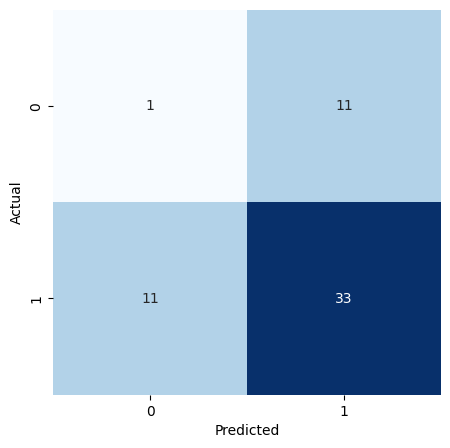

In [30]:
import seaborn as sns
print("Confusion Matrix:")
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<_MapDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [110]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load your CSV with ground truth pixel masks
gt_csv = pd.read_csv(csv_path)
csv_path = '/content/drive/My Drive/data_XAI/pancreas/pancreas/attention_label/results_img_PT7_factual.csv'


# Assuming preds and test_ds are ready
# Convert model outputs (logits) to binary predictions
y_pred_probs = tf.sigmoid(preds).numpy().flatten()
y_pred = (y_pred_probs >= 0.5).astype(int)

# Extract ground truth labels and image filenames from test_ds
y_true = []
filenames = []

for img_batch, label_batch in test_ds.unbatch():
    y_true.append(int(label_batch.numpy()))
    if hasattr(img_batch, 'numpy'):  # just to be safe
        filenames.append(getattr(img_batch, 'filename', None))  # might be None

# If filename isn’t available, fallback idea:
# Use file order from directory listing (only if order wasn’t shuffled)
# Or you can build filenames manually if known

y_true = np.array(y_true)
assert len(y_true) == len(y_pred) == len(gt_csv), "Mismatch in sample counts!"

# Build TP/FP status per image
results = []
for i in range(len(y_true)):
    truth = y_true[i]
    pred = y_pred[i]
    img_name = gt_csv.iloc[i]['img_idx']  # assuming row alignment

    is_tp = int(pred == 1 and truth == 1)
    is_fp = int(pred == 1 and truth == 0)

    results.append({
        "img_idx": img_name,
        "y_true": int(truth),
        "y_pred": int(pred),
        "TP": is_tp,
        "FP": is_fp
    })

results_df = pd.DataFrame(results)
print(results_df.head())


AssertionError: Mismatch in sample counts!

In [44]:
# prompt: model true positve, flase negative and also collect true positve and their label in df_pred

In [33]:
# prompt: model true positve, flase posibt and also collect true positve and their label in df_pred

import pandas as pd

# Assuming 'preds' contains your model predictions and 'test_ds' is your test dataset
#  and you have the true labels available in test_ds
df_pred = pd.DataFrame(columns=['true_label', 'prediction'])
true_positives = 0
false_positives = 0

for images, labels in test_ds:
  predictions = model.predict(images)
  # Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
  binary_predictions = (predictions > 0.5).astype(int)

  for i in range(len(labels)):
      true_label = labels[i].numpy()
      predicted_label = binary_predictions[i][0]

      # Create a new DataFrame for the current row
      new_row_df = pd.DataFrame({'true_label': [true_label], 'prediction': [predicted_label]})

      df_pred = pd.concat([df_pred, new_row_df], ignore_index=True)

      if true_label == 1 and predicted_label == 1:
          true_positives += 1
      elif true_label == 1 and predicted_label == 0:
          false_positives += 1

print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")

# Now df_pred contains the true labels and predictions
# You can further analyze or filter this DataFrame
# For example to get true positives and their labels:
true_positive_df = df_pred[(df_pred['true_label'] == 1) & (df_pred['prediction'] == 1)]
print("\nTrue Positives and their labels:")
true_positive_df

NameError: name 'model' is not defined

In [28]:
preds.shape

(56, 1)

In [35]:
# prompt: load results_img_PT7_factual.csv from colab

import pandas as pd

# Assuming the CSV file is in your Google Drive, replace with the actual path
file_path = '/content/drive/My Drive/data_XAI/pancreas/pancreas/attention_label/results_img_PT7_factual.csv'

df = pd.read_csv(file_path)
df.head()


Unnamed: 0           img_idx  \
0           0  pancreas_074.png   
1           1  pancreas_048.png   
2           2  pancreas_289.png   
3           3  pancreas_262.png   
4           4  pancreas_276.png   

                                           attention img_check matrix_resize  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      good    (224, 224)  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      good    (224, 224)  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      good    (224, 224)  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      good    (224, 224)  
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...      good    (224, 224)

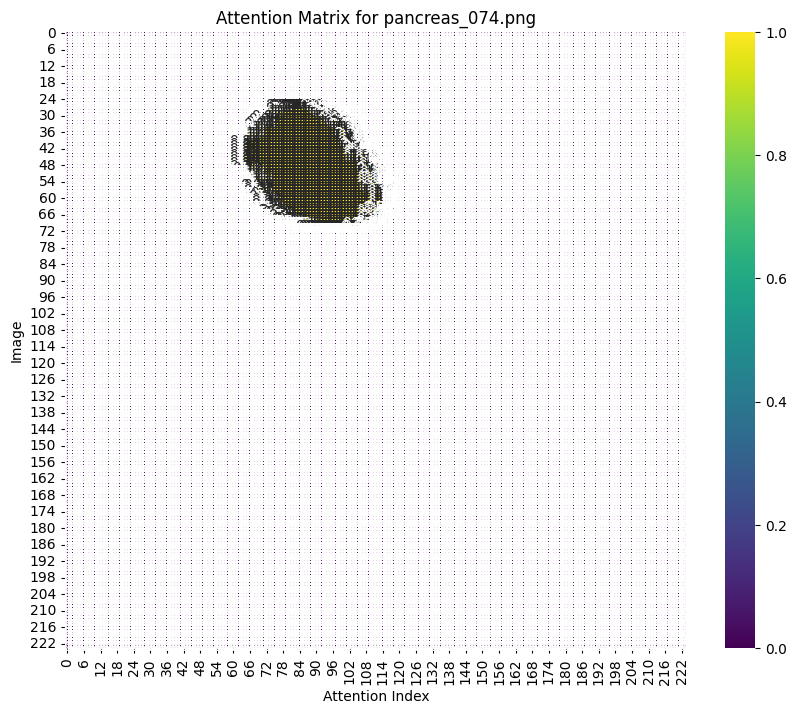

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import ast # Import the ast module for literal evaluation

# ... (your existing code) ...

# Convert 'attention' column to lists of floats
#image_data['attention'] = image_data['attention'].apply(ast.literal_eval)

# Extract the first attention list (assuming there's only one row for the image)
attention_values = image_data['attention'].values[0]

# Create the matrix plot
plt.figure(figsize=(10, 8))
sns.heatmap(np.array(attention_values), annot=True, cmap='viridis')

plt.title('Attention Matrix for pancreas_074.png')
plt.xlabel('Attention Index')
plt.ylabel('Image')
plt.show()

In [37]:
test_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input # Correct import for Xception
from keras import layers
from tensorflow import data as tf_dat

#model=base_model= inet_model = load_model('./model_xception_batch16_epoch5.keras')

target_size = (299,299)

# Preprocess the images

## Transform the images

In [34]:
path_test

'/content/drive/My Drive/data_XAI/pancreas/pancreas/test/'

In [38]:
df['img_idx']

0      pancreas_074.png
1      pancreas_048.png
2      pancreas_289.png
3      pancreas_262.png
4      pancreas_276.png
             ...       
276    pancreas_284.png
277    pancreas_051.png
278    pancreas_045.png
279    pancreas_092.png
280    pancreas_086.png
Name: img_idx, Length: 281, dtype: object

In [92]:
images_path = path_test + "pos/"

In [89]:
path_test

'/content/drive/My Drive/data_XAI/pancreas/pancreas/test/'

In [84]:
test_ds.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4>

In [85]:
for images, labels in test_ds:  # Unpack the tuple into images and labels
  print(images.shape)  # Access the shape of the image tensor
  print(labels.shape)  # Access the shape of the label tensor (if needed)

(16, 299, 299, 3)
(16,)
(16, 299, 299, 3)
(16,)
(16, 299, 299, 3)
(16,)
(8, 299, 299, 3)
(8,)


In [97]:
folder_path= '/content/drive/My Drive/data_XAI/pancreas/pancreas/test/pos/'

In [130]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import xception

# Your folder path
#folder_path = 'path/to/your/images'

# Transform function
def transform_img_fn(images_path, target_size):
    out = []
    for img_path in images_path:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = xception.preprocess_input(x)  # Preprocessing for InceptionV3 (or any other model)
        out.append(x)
    return np.vstack(out)

# Efficient Image Loading
images = []
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other image extensions if needed
        img_path = os.path.join(folder_path, filename)
        # Append transformed image (processed & preprocessed)
        image_names
        images.append(transform_img_fn([img_path], target_size)[0])

# Convert list to numpy array (final image dataset)
images = np.array(images)

print(f"Processed {len(images)} images.")

Processed 44 images.


In [131]:
len(images)

44

In [133]:
out = test_ds

## Let's see the top 5 prediction for some image

> Add blockquote



# LIME Implementation


In [50]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
def implement_lime(model, image):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image[0].astype('double'),
                                             model.predict,
                                             top_labels=5,
                                             hide_color=0,
                                             num_samples=1
                                             )
    explanation_lime = explanation
    return explanation_lime

In [99]:
def explain_with_lime(explanation_lime, image, num_features, top_candidate):
    temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[top_candidate], positive_only=True, num_features= num_features, hide_rest=False, min_weight=0.1)
    plt.figure()
    plt.title("Number of Features= " + str(num_features))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [134]:
images.shape[0]

44

In [102]:
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
for i in range(images.shape[0]):
    #plt.figure()

    # Predict for a single image at a time
    pred = model.predict(images[i:i+1])

    # Print the prediction (it will be a single value)
    #print(f"Prediction for image {i}: {pred[0][0]}")

    # Display the image (if needed)
    #plt.imshow(images[i] / 2 + 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


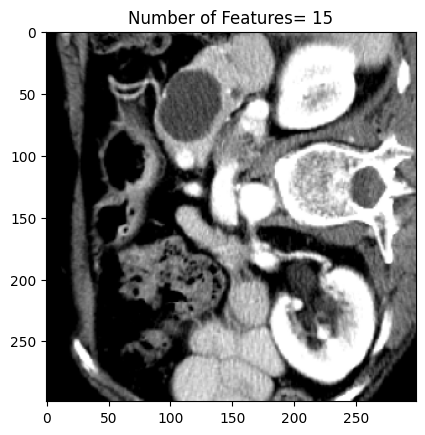

In [142]:
explanation_lime = implement_lime(model, images)
explain_with_lime(explanation_lime, images, num_features=15, top_candidate=0)

In [137]:
images.shape

(44, 299, 299, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
<ipython-input-99-5d61dd226425>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 705ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


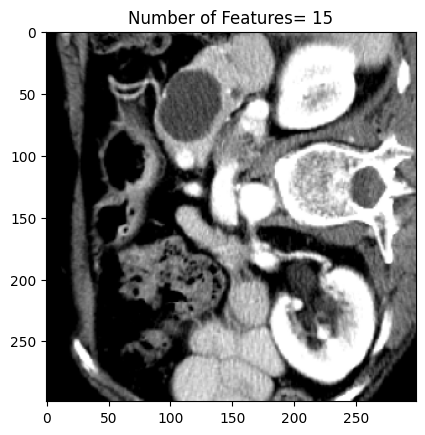

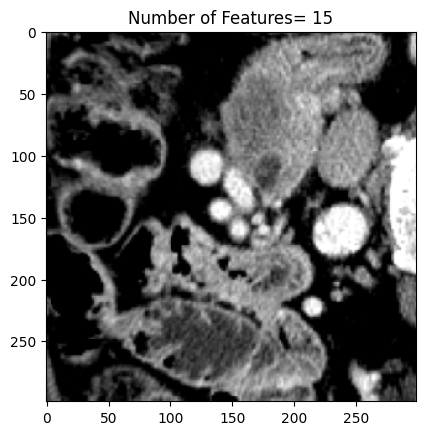

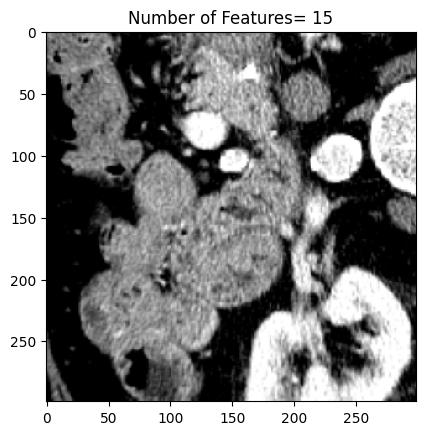

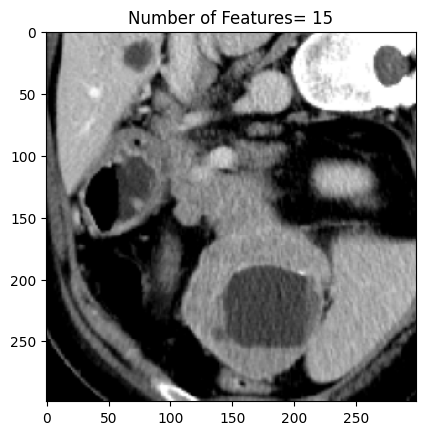

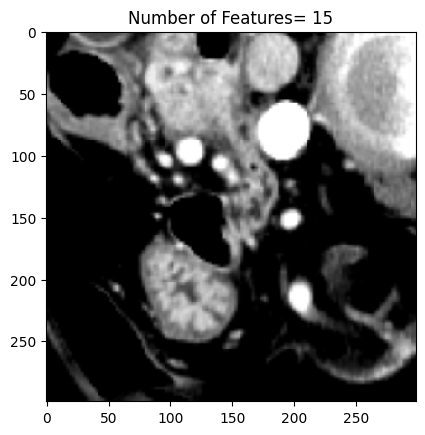

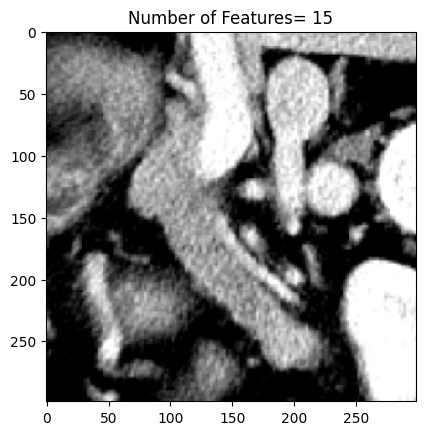

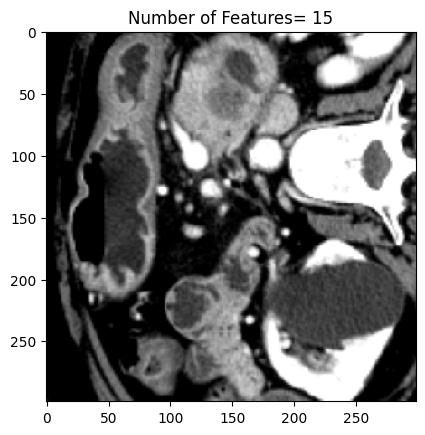

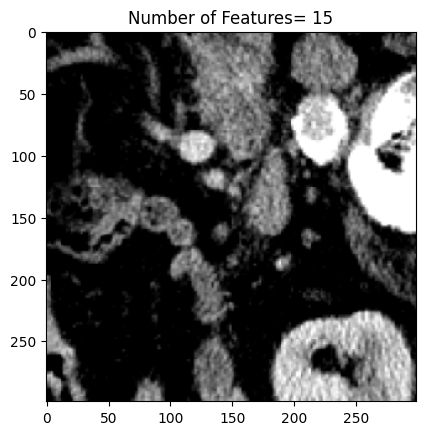

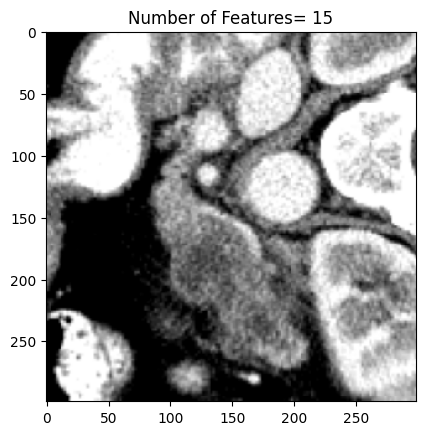

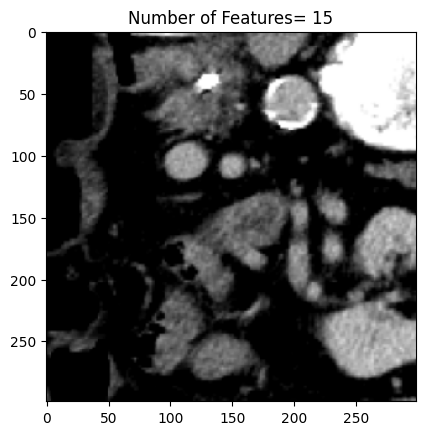

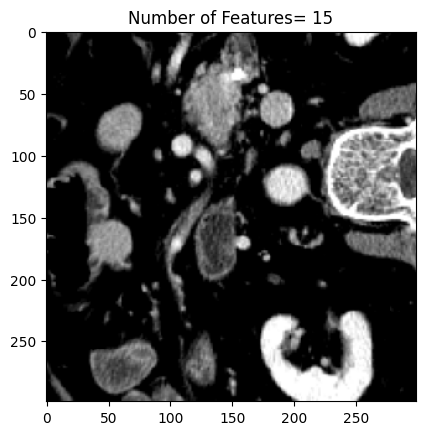

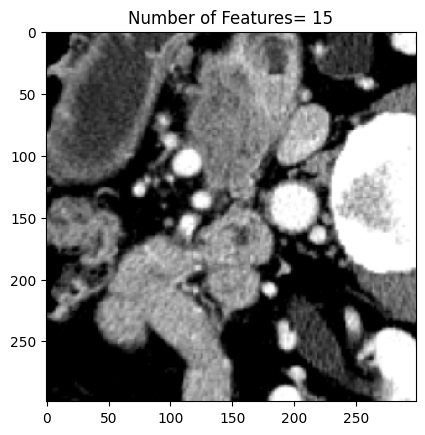

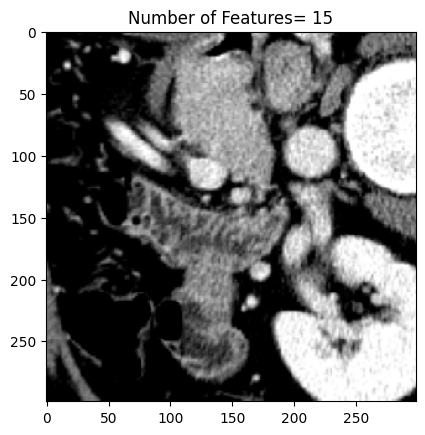

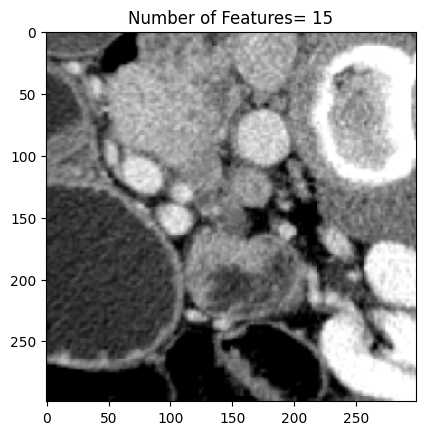

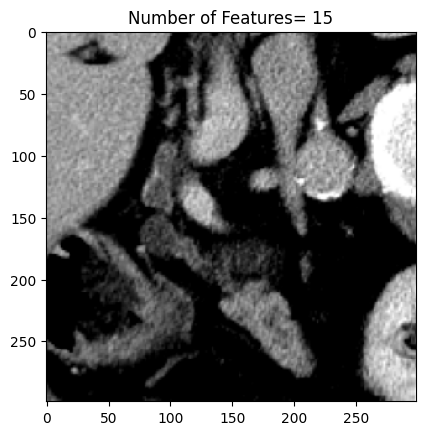

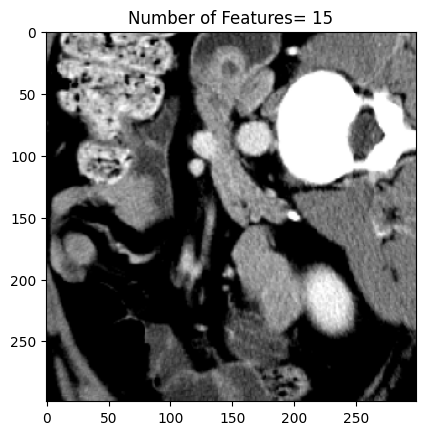

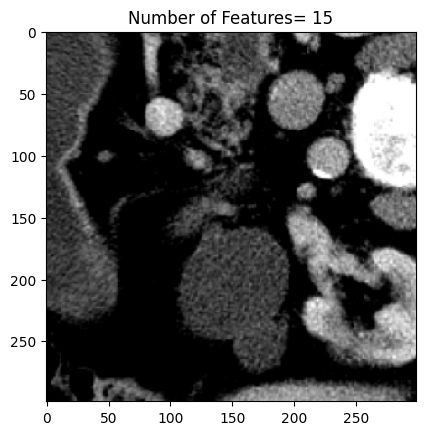

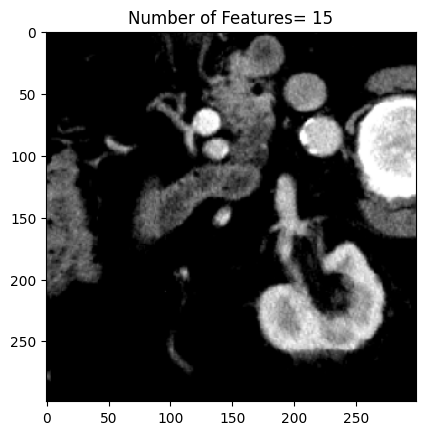

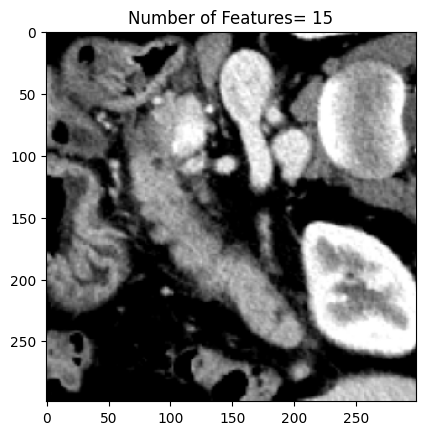

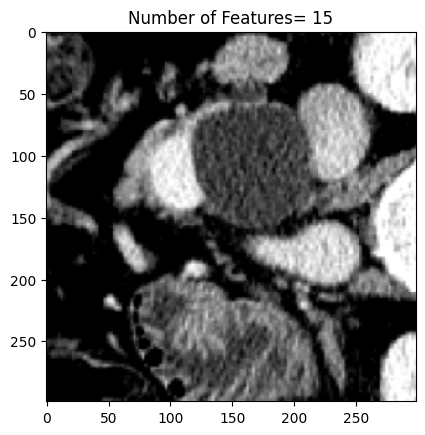

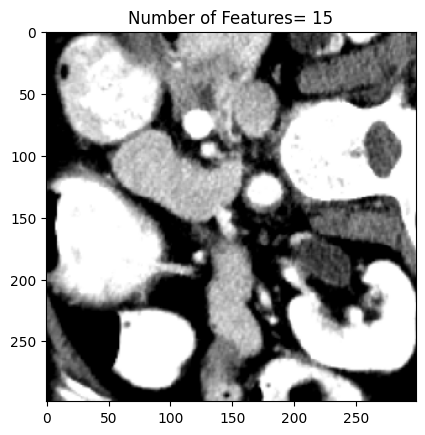

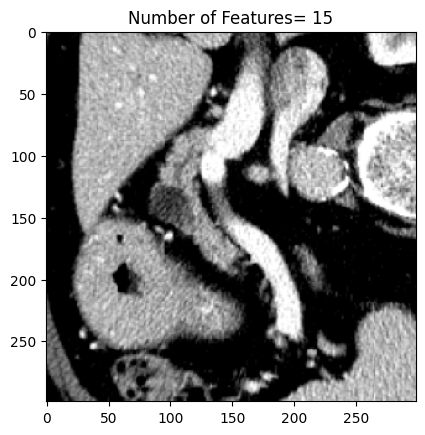

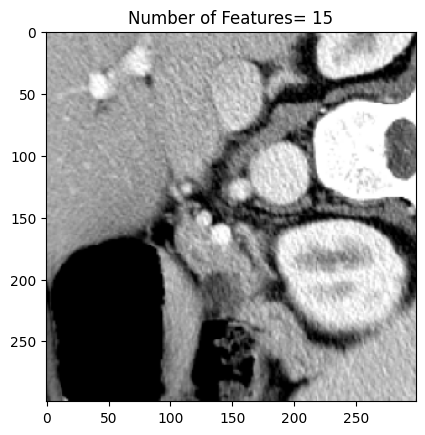

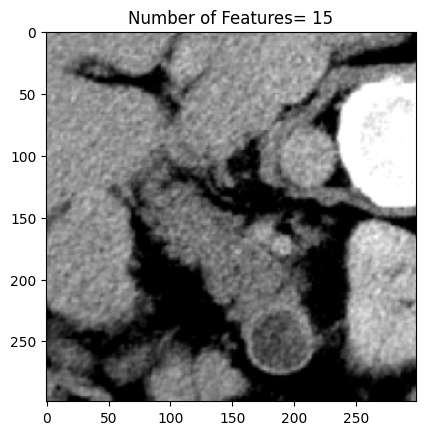

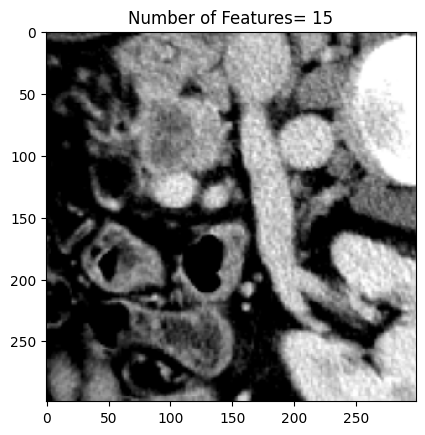

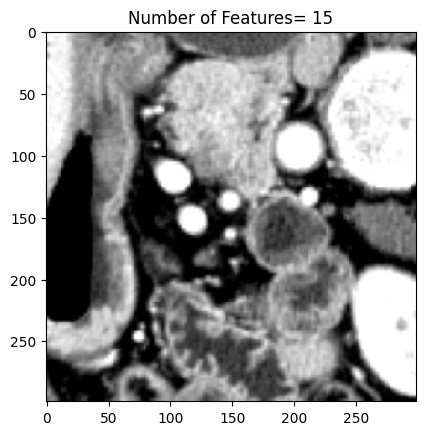

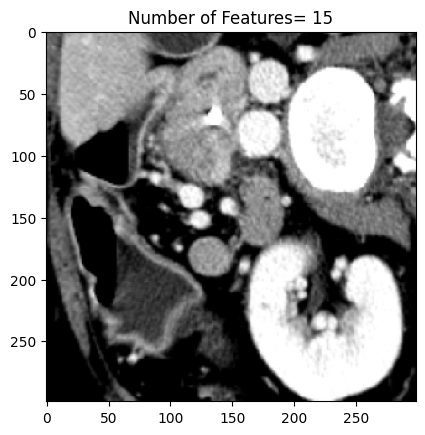

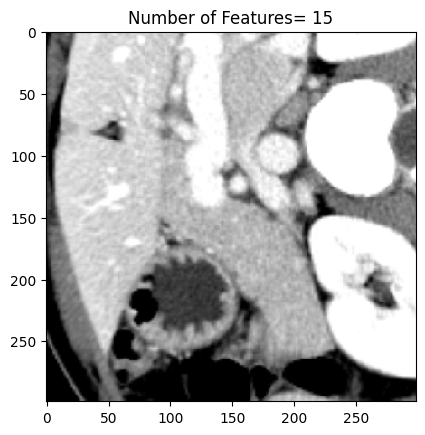

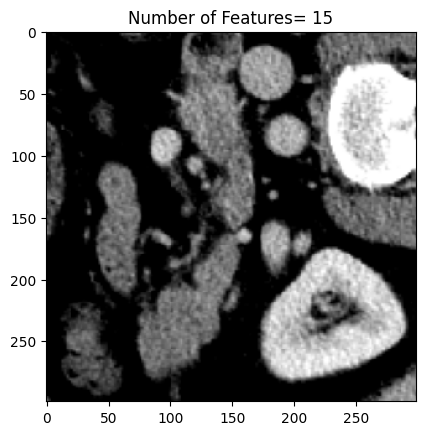

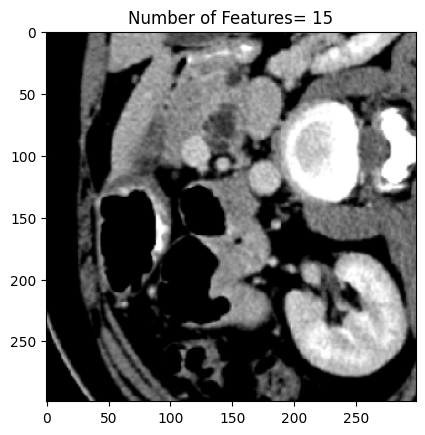

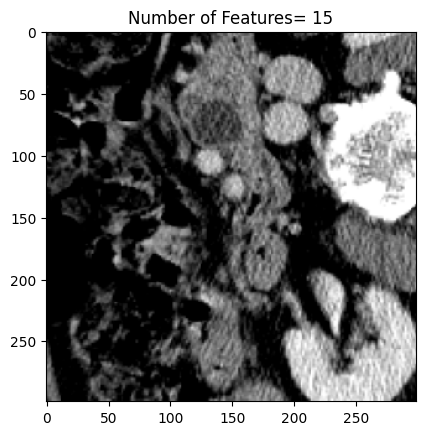

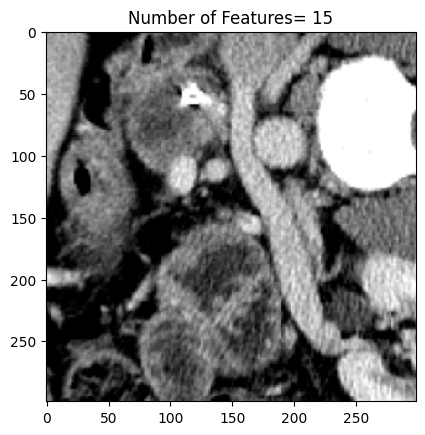

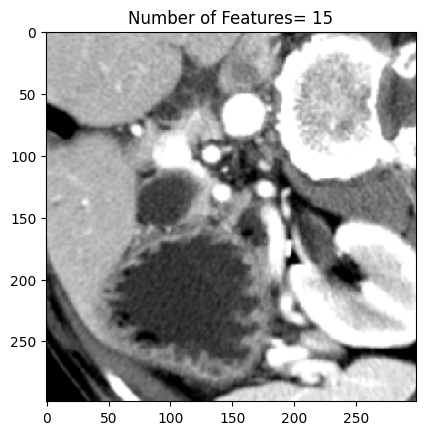

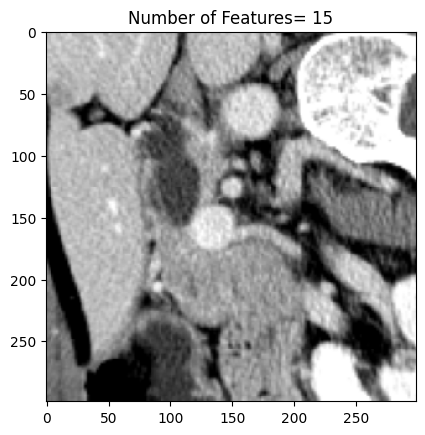

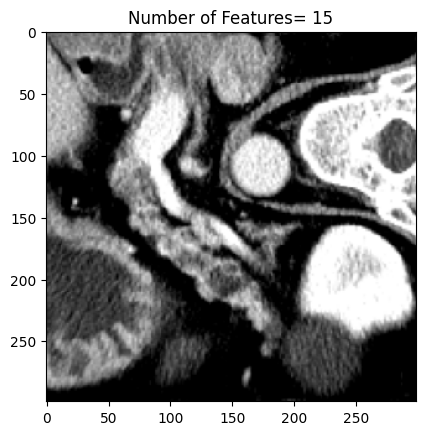

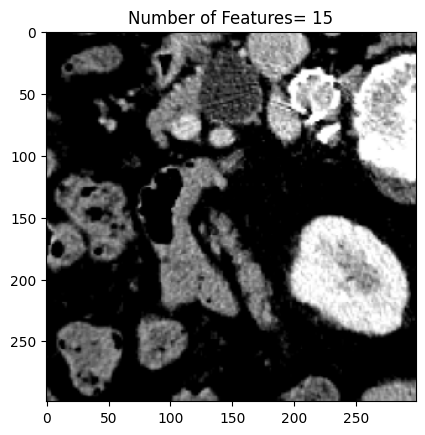

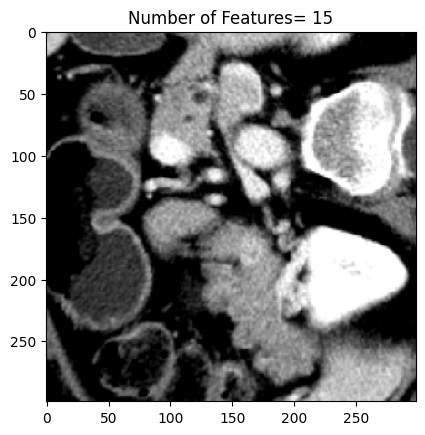

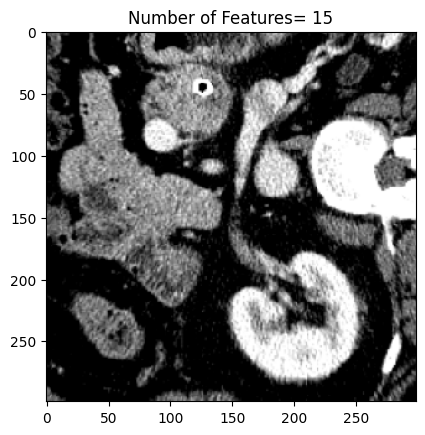

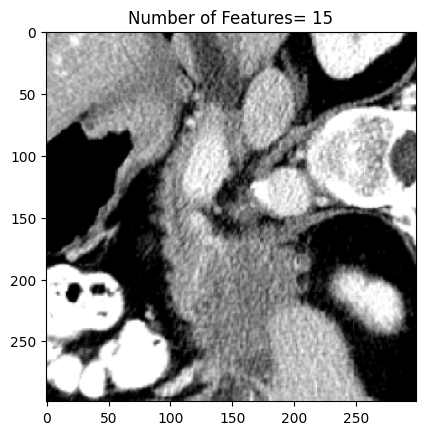

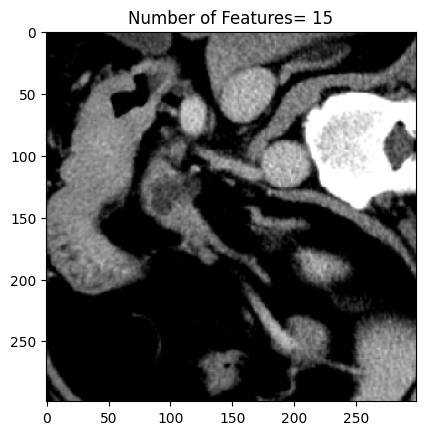

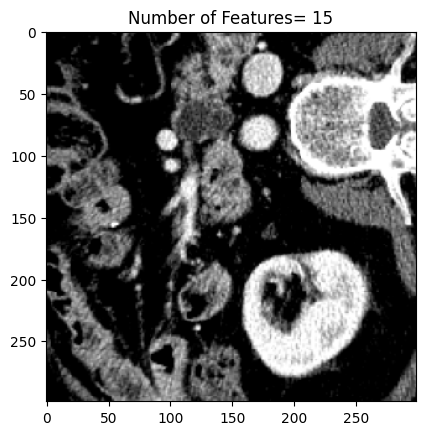

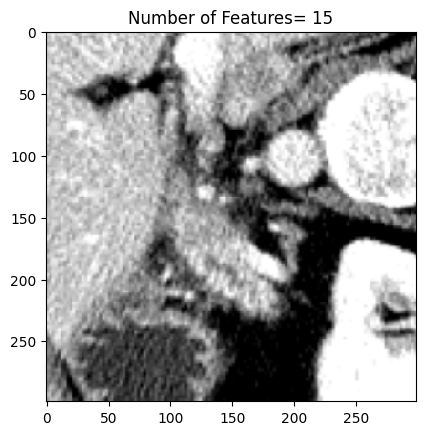

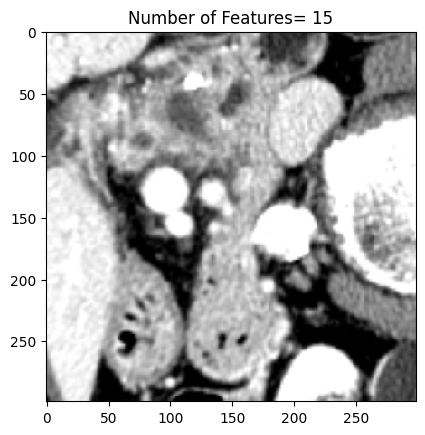

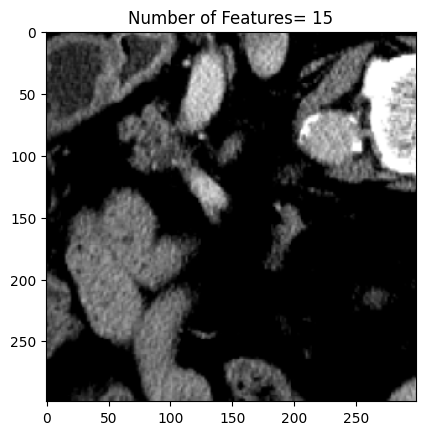

In [144]:
# prompt: for each member of images array, implement lime and explain by lime

import matplotlib.pyplot as plt
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# ... (your existing code) ...

# Assuming the 'images' array is correctly populated and preprocessed

# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
for i in range(images.shape[0]):
    #plt.figure()

    # Predict for a single image at a time
    pred = model.predict(images[i:i+1])

    # Print the prediction (it will be a single value)
    #print(f"Prediction for image {i}: {pred[0][0]}")

    # Display the image (if needed)
    #plt.imshow(images[i] / 2 + 0.5)

    explanation_lime = implement_lime(model, images[i:i+1]) # Pass a single image
    explain_with_lime(explanation_lime, images[i:i+1], num_features=15, top_candidate=0)


In [126]:
temp=[]
mask=[]

for images in images:
  explanation_lime= implement_lime(model, images)
  explain_with_lime(explanation_lime, images, num_features=15, top_candidate=0)
  temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[0], positive_only=True, num_features=10, hide_rest=True)


ValueError: Only RGB images can be converted to Lab space.

In [145]:
mask.shape

AttributeError: 'list' object has no attribute 'shape'

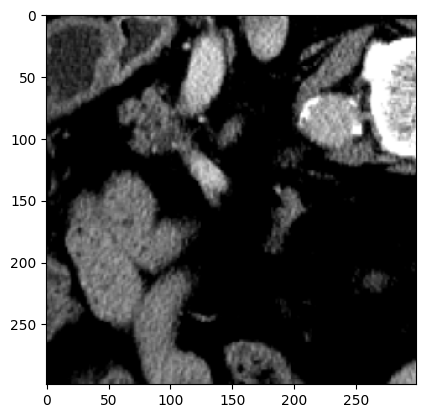

In [146]:
temp, mask = explanation_lime.get_image_and_mask(explanation_lime.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [147]:
def heatmap_lime(explanation_lime, image, num_features, top_candidate):
    ind =  explanation_lime.top_labels[0]
    dict_heatmap_lime = dict(explanation_lime.local_exp[ind])
    heatmap_lime = np.vectorize(dict_heatmap_lime.get)(explanation_lime.segments)
    plt.imshow(heatmap_lime, cmap = 'RdBu', vmin  = -heatmap_lime.max(), vmax = heatmap_lime.max())
    plt.colorbar()


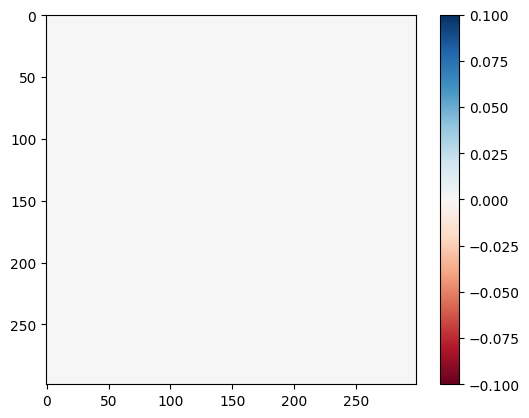

In [148]:
heatmap_lime(explanation_lime, images, num_features=15, top_candidate=0)



---



# Grad_cam++ implementation

In [149]:
img_path

'/content/drive/My Drive/data_XAI/pancreas/pancreas/test/pos/pancreas_055.png'

In [150]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

def get_last_conv_layer_name(model, base_model_name="xception"):
    """Finds the last Conv2D/SeparableConv2D layer inside the base model (Xception)."""
    base_model = model.get_layer(base_model_name)  # Extract Functional Xception model
    for layer in reversed(base_model.layers):
        if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.SeparableConv2D)):
            return layer.name  # Return last Conv layer's name
    raise ValueError(f"No convolutional layers found in {base_model_name}.")



In [151]:
def make_gradcam_heatmap(img_array, model, base_model_name="xception", pred_index=None):
    # Get the last conv layer inside Xception
    last_conv_layer_name = get_last_conv_layer_name(model, base_model_name)

    # Create model that maps input image to activations of last conv layer + predictions
    grad_model = keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(base_model_name).get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the predicted class with respect to the feature map
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])

        # Ensure pred_index is an integer
        #pred_index = tf.get_static_value(pred_index).item()

        class_channel = preds[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradients over the feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the Grad-CAM heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


In [2]:
def make_gradcam_batch(img_array, model, batch_size=32):
    num_images = img_array.shape[0]
    heatmaps = []

    for i in range(0, num_images, batch_size):
        batch = img_array[i : i + batch_size]  # Process a batch of images
        batch_heatmaps = make_gradcam_heatmap(batch, model)  # Call existing function
        heatmaps.append(batch_heatmaps)

    return np.vstack(heatmaps)  # Merge heatmaps from all batches


In [3]:
heatmaps = make_gradcam_batch(images, model, batch_size=16)

NameError: name 'images' is not defined

In [ ]:
'''
def transform_img_fn(path_list, target_size):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)
'''
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps input image to activations of last conv layer + predictions
    grad_model = keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute the gradient of the predicted class with respect to the feature map
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])

        # Ensure pred_index is an integer
        pred_index = tf.get_static_value(pred_index).item()

        class_channel = preds[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute the mean intensity of the gradients over the feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the Grad-CAM heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


In [ ]:
heatmap = make_gradcam_heatmap(images , model)

In [153]:
images

array([[[[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-0.05098039, -0.05098039, -0.05098039],
         [-0.11372548, -0.11372548, -0.11372548],
         [-0.21568626, -0.21568626, -0.21568626]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-0.03529412, -0.03529412, -0.03529412],
         [-0.08235294, -0.08235294, -0.08235294],
         [-0.21568626, -0.21568626, -0.21568626]],

        [[-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         [-1.        , -1.        , -1.        ],
         ...,
         [-0.12156862, -0.12156862, -0.12156862],
         [-0.09803921, -0.09803921, -0.09803921],
         [-0.18431371, -0.18431371, -0.18431371]],

        ...,

        [[-1.        , -1.        , -1

In [ ]:
model_builder = keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="xception",
)
#model_builder.set_weights("imagenet") #xception.Xception(weights="imagenet")
img_size = (150, 150)
preprocess_input = xception.preprocess_input
decode_predictions = decode_predictions

# Assuming 'model' is your Keras model
layer_names = [layer.name for layer in model_builder.layers]
conv2d_layers = [name for name in layer_names if "conv2d" in name]
last_conv2d_layer_name = conv2d_layers[-1]

print(f"The last conv2d layer is: {last_conv2d_layer_name}")

last_conv_layer_name = last_conv2d_layer_name ="block14_sepconv2_act"


# The local path to our target image
img_path = path+"pos"  # Assuming the image is in the current directory.

display(Image(img_path))




In [ ]:
xception_model = model.get_layer("xception")  # Get the Xception model
xception_model.summary()  # Check its layers


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
import tensorflow as tf

last_conv_layer = None

for layer in reversed(xception_model.layers):
    if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.SeparableConv2D)):
        last_conv_layer = layer
        break

print(f"Last Conv Layer: {last_conv_layer.name}")


Last Conv Layer: block14_sepconv2


In [ ]:
last_conv_layer_name = last_conv_layer.name


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,481,533 (238.35 MB)

 Trainable params: 20,809,001 (79.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 41,618,004 (158.76 MB)

In [ ]:
# Assuming 'model' is your Keras model
layer_names = [layer.name for layer in model.layers]

# Find convolutional layers (adapt the condition if necessary)
conv2d_layers = [name for name in layer_names if "conv" in name]  # Changed to "conv"

# Check if any convolutional layers were found
if conv2d_layers:
    last_conv2d_layer_name = conv2d_layers[-1]
    print(f"The last conv2d layer is: {last_conv2d_layer_name}")
else:
    print("No convolutional layers found in the model.")
    # Handle the case where no convolutional layers are found, e.g., exit or use a different layer

No convolutional layers found in the model.


In [ ]:
preds

In [ ]:
# Prepare image
# Resize the images to the expected input shape (299, 299)
img_array = tf.image.resize(images, (299, 299))

# Make model
model = model

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
#preds = model.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=5)[0])
'''
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()'''

'\n# Generate class activation heatmap\nheatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)\n\n# Display heatmap\nplt.matshow(heatmap)\nplt.show()'

In [ ]:
# Prepare image
img_array = images

# Make model
model = model_builder

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
#preds = model.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=5)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


ValueError: Input 0 of layer "functional_4" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(281, 150, 150, 3)

In [ ]:

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

NameError: name 'heatmap' is not defined

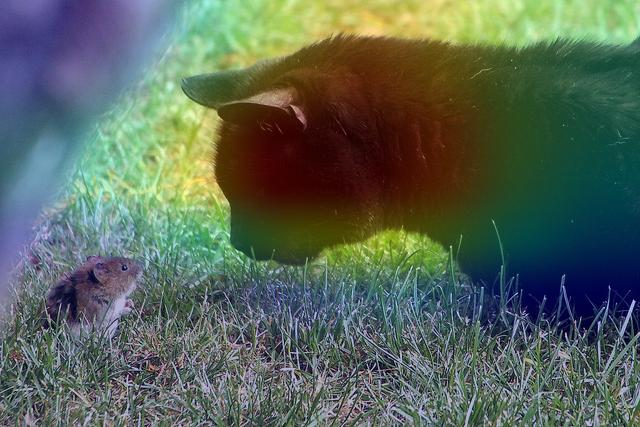

In [ ]:
save_and_display_gradcam(img_path, heatmap)

# SHAP implementation

In [ ]:
# prompt: download resnet50



# Load the ResNet50 model
model_res = tf.keras.applications.ResNet50(weights='imagenet')

print("ResNet50 model loaded successfully.")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
ResNet50 model loaded successfully.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:42, 21.20s/it]


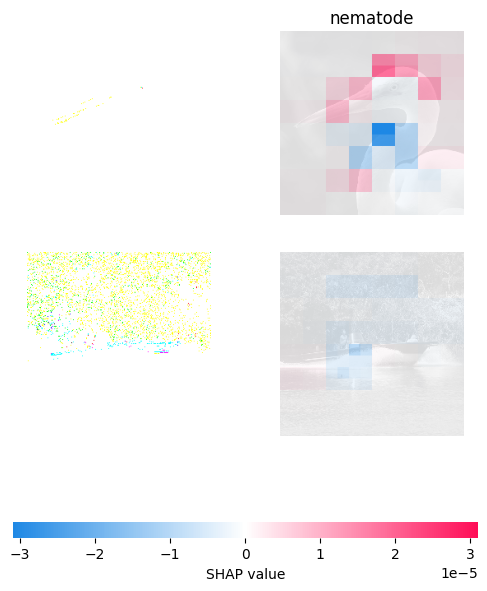

In [ ]:
import json


import shap

# load pre-trained model and choose two images to explain
model = model_res


def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)


X, y = shap.datasets.imagenet50()

# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values)

In [ ]:
# prompt: SHAP implemnatio

import shap

# ... (your existing code) ...

# Assuming 'model' is your Keras model and 'images' contains your image data.
# Replace with your actual model and image data.


def explain_with_shap(model, images):
    # Create a SHAP explainer
    explainer = shap.DeepExplainer(model, images)  # Use DeepExplainer for deep learning models

    # Calculate SHAP values
    shap_values = explainer.shap_values(images)

    return shap_values

shap_explanation = explain_with_shap(model_builder, images)

# Assuming shap_explanation is a list of arrays (one for each class).
# Visualize SHAP values for the top predicted class (adjust index as needed).

# Get the index of the top prediction (Example)
pred_index = np.argmax(model_builder.predict(images))

# Plot the SHAP values
shap.image_plot(shap_explanation[pred_index], -images) # Use -images to correctly plot

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_313
Received: inputs=['Tensor(shape=(1, 299, 299, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_313
Received: inputs=['Tensor(shape=(2, 299, 299, 3))']
  warnings.warn(msg)


KeyboardInterrupt: 

In [ ]:
import shap

# Load your pre-trained InceptionV3 model
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights="imagenet")

# Select a few background images (for DeepExplainer, but GradientExplainer works better)
background = np.random.randn(5, 299, 299, 3) * 255  # Dummy images, replace with real ones

# Explain the prediction
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values(images)

# Visualize SHAP values
shap.image_plot(shap_values, preprocess_img("cat_mouse.jpg"))


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1252
Received: inputs=['Tensor(shape=(1, 299, 299, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_1252
Received: inputs=['Tensor(shape=(50, 299, 299, 3))']
  warnings.warn(msg)
